In [1]:
import numpy as np
import torch
import sys
import os

In [2]:
sys.path.append('../../')
sys.path.append('../')
os.chdir('../experiments/siampose_rcnn_base//')

In [3]:
from utils.config_helper import load_config
from datasets.siam_rcnn_dataset import DataSets
from utils.bbox_helper import *
from utils.anchors import Anchors

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
class Args:
    def __init__(self):
        self.config = './config.json'
        self.arch = 'custom'
        self.epochs = 20

In [6]:
args = Args()
cfg = load_config(args)
train_set = DataSets(cfg['train_datasets'], cfg['anchors'])

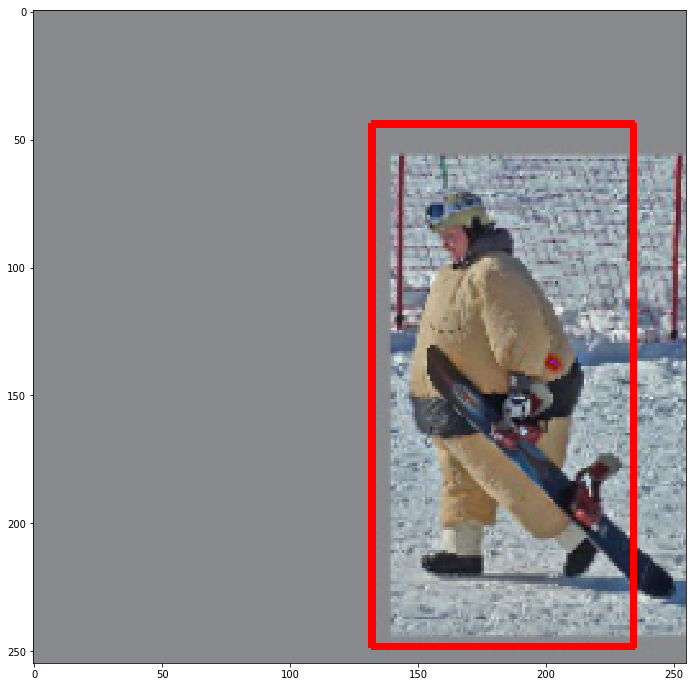

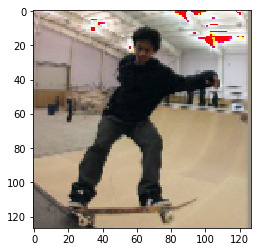

In [31]:
i = 37
output_i = train_set[i]
template = output_i[0]
search = output_i[1]
bbox = output_i[5]
kp = output_i[-3]
ret = output_i[-4]

template_img = output_i[-2]
search_img = output_i[-1]

import matplotlib.pyplot as plt
import cv2
import matplotlib
%matplotlib inline

search = search.transpose(1, 2, 0).astype(np.uint8)[:,:,::-1]
template = template.transpose(1, 2, 0).astype(np.uint8)[:,:,::-1]

search_show = search.copy()
x1, y1, x2, y2 = bbox.astype(np.int)
cv2.rectangle(search_show, (x1, y1), (x2, y2), (255, 0, 0), 2)
for i in range(len(kp)):
    if kp[i, 2] > 0:
        cv2.circle(search_show, tuple(kp[i, :2].astype(np.int)), 2, [0, 255, 0], 1)
plt.figure(figsize=(15, 12))
plt.imshow(search_show)
plt.show()

plt.imshow(template)

In [15]:
ret['hp_mask']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

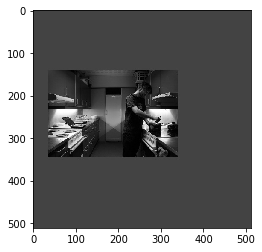

In [8]:
plt.imshow(template_img)

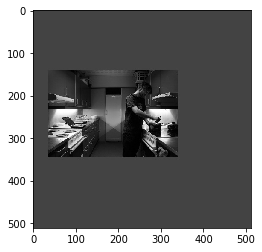

In [9]:
plt.imshow(search_img)